In [20]:
import pandas as pd
train=pd.read_csv('mnist_train.csv')

In [21]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import numpy as np
y=train['label']
print(train.columns)
_X=train.values
X=np.delete(_X,0,1)
X=X>=100

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


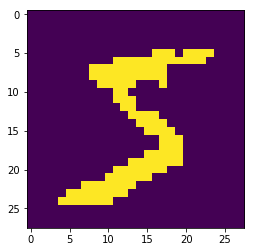

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(X[0].astype('int').reshape(28,28))
plt.show()

In [24]:
X.shape

(60000, 784)

In [25]:
y1=(y==0).astype('int')
for i in range(1,10):
    yi=(y==i).astype('int')
    y1=np.c_[y1,yi]
y1

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [26]:
import tensorflow as tf
input_node=784
output_node=10
layer1_node=500
batch_size=100
learning_rate_base=0.01
learning_rate_decay=0.99
regularization_rate=0.0001
training_steps=30000
moving_average_decay=0.99
def inference(x,avg_class,w1,b1,w2,b2):
    if avg_class==None:
        layer1=tf.nn.relu(tf.matmul(x,w1)+b1)
        return tf.matmul(layer1,w2)+b2
    else:
        layer1=tf.nn.relu(tf.matmul(x,avg_class.average(w1))+avg_class.average(b1))
        return tf.matmul(layer1,avg_class.average(w2))+avg_class.average(b2)
def train(mnist):
    x=tf.placeholder(tf.float32,[None,input_node],name='x-input')
    y_=tf.placeholder(tf.float32,[None,output_node],name='y-input')
    w1=tf.Variable(tf.random_normal([input_node,layer1_node],stddev=0.1))
    w2=tf.Variable(tf.random_normal([layer1_node,output_node],stddev=0.1))
    b1=tf.Variable(tf.constant(0.1,shape=[layer1_node]))
    b2=tf.Variable(tf.constant(0.1,shape=[output_node]))
    y=inference(x,None,w1,b1,w2,b2)
    global_step=tf.Variable(0,trainable=False)
    cross_entropy=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y,labels=tf.argmax(y_,1))
    cross_entropy_mean=tf.reduce_mean(cross_entropy)
    regularizer=tf.contrib.layers.l2_regularizer(regularization_rate)
    regularization=regularizer(w1)+regularizer(w2)
    loss=cross_entropy_mean+regularization
    learning_rate=tf.train.exponential_decay(learning_rate_base,global_step,mnist['x'].shape[0]/batch_size,learning_rate_decay)
    train_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(y_,1)),tf.float32))
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        feed={x:mnist['x'],y_:mnist ['y']}
        for i in range(training_steps):
            if i%1000==0:
                v_acc=sess.run(accuracy,feed_dict=feed)
                print(i,v_acc*100)
            xi,yi=mnist['x'][i%mnist['x'].shape[0]:(i+batch_size)%mnist['x'].shape[0]],mnist['y'][i%mnist['x'].shape[0]:(i+batch_size)%mnist['x'].shape[0]]
            sess.run(train_step,feed_dict={x:xi,y_:yi})
mnist=dict()
mnist['x']=X
mnist['y']=y1
train(mnist)

0 8.283333480358124
1000 83.13166499137878
2000 86.17500066757202
3000 87.30999827384949
4000 88.5116696357727
5000 89.62500095367432
6000 89.58500027656555
7000 89.88500237464905
8000 90.38333296775818
9000 90.03499746322632
10000 90.4883325099945
11000 89.90333080291748
12000 91.16833209991455
13000 90.65333604812622
14000 91.90499782562256
15000 91.92000031471252
16000 92.46833324432373
17000 92.81166791915894
18000 92.74333119392395
19000 93.32000017166138
20000 92.66999959945679
21000 93.22166442871094
22000 93.52166652679443
23000 93.7166690826416
24000 93.91833543777466
25000 94.28666830062866
26000 94.01999711990356
27000 93.95666718482971
28000 93.96666884422302
29000 94.64499950408936
